In [5]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 9.7 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
import os.path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from playstore.config import CLEAN_DATA_DIR

In [7]:
# Load Data
df = pd.read_csv(os.path.join(CLEAN_DATA_DIR,'googleplaystore_cleaned_category.csv')) 

In [26]:
print("Data Overview:")
print(df.head())
print("\nData Info:")
print(df.info())

def preprocess_data(data):
    # Convert 'Installs' to numeric, handling commas and invalid values
    data['Installs'] = data['Installs'].str.replace(',', '').str.replace('+', '')
    data['Installs'] = pd.to_numeric(data['Installs'], errors='coerce').fillna(0).astype(int)
    
    # Convert 'Rating' to numeric
    data['Rating'] = pd.to_numeric(data['Rating'], errors='coerce').fillna(data['Rating'].mean())
    
    return data

# Preprocess the DataFrame
df = preprocess_data(df)

def analyze_category_success(data):
    # Define success as apps with > 1M installs and a rating > 4.0
    data['Success'] = ((data['Installs'] > 1_000_000) & (data['Rating'] > 4.0)).astype(int)
    
    category_success = data.groupby('Category')['Success'].mean().sort_values(ascending=False)
    plt.figure(figsize=(12, 8))
    category_success.plot(kind='bar', color='skyblue')
    plt.title('Success Rate by Category', fontsize=16)
    plt.ylabel('Success Rate', fontsize=12)
    plt.xlabel('Category', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

analyze_category_success(df)


Data Overview:
                                                 App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

   Reviews  Size  Installs  Type Price Content Rating  \
0      159   NaN     10000  Free     0       Everyone   
1      967   NaN    500000  Free     0       Everyone   
2    87510   NaN   5000000  Free     0       Everyone   
3   215644   NaN  50000000  Free     0           Teen   
4      967   NaN    100000  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Prete

AttributeError: Can only use .str accessor with string values!

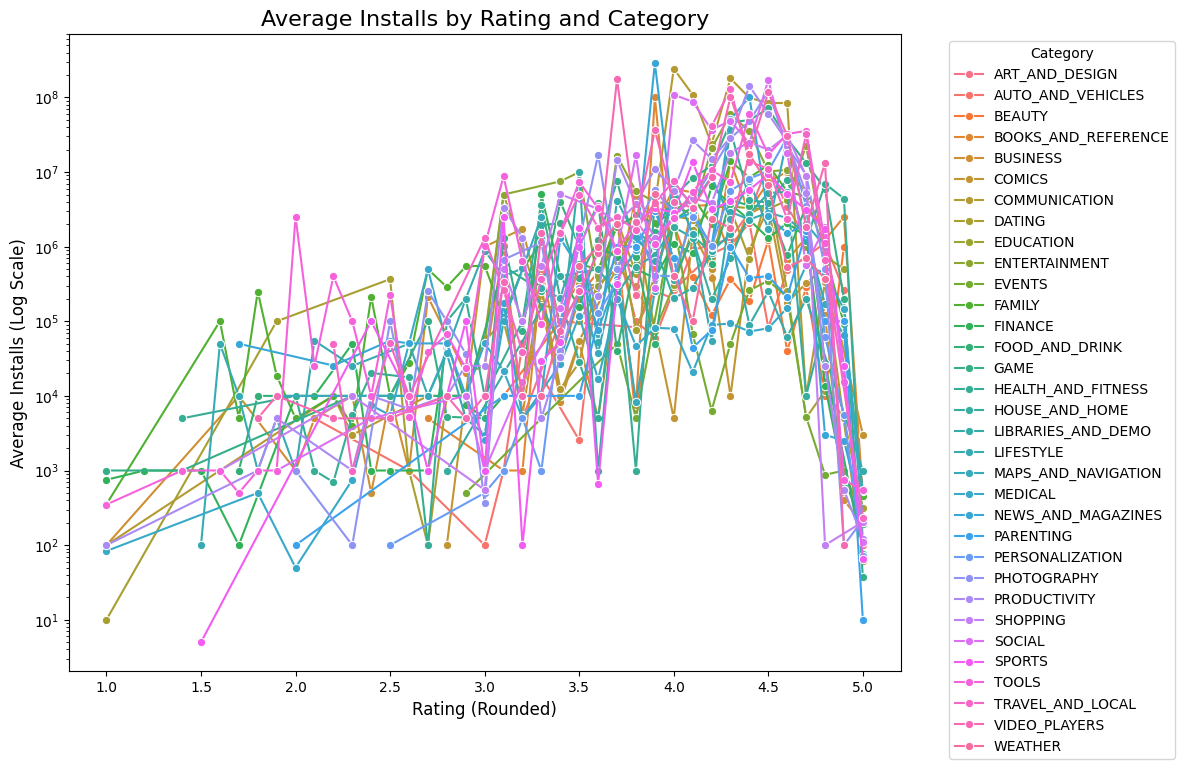

In [27]:
def analyze_rating_vs_downloads_aggregated(data):
    # Aggregate data by category and rounded ratings
    data['Rating_Rounded'] = data['Rating'].round(1)  # Round ratings to one decimal
    aggregated = data.groupby(['Category', 'Rating_Rounded'])['Installs'].mean().reset_index()
    
    # Plot the aggregated data
    plt.figure(figsize=(12, 8))
    sns.lineplot(
        data=aggregated,
        x='Rating_Rounded',
        y='Installs',
        hue='Category',
        marker='o'
    )
    plt.yscale('log')  # Logarithmic scale for better visibility
    plt.title('Average Installs by Rating and Category', fontsize=16)
    plt.xlabel('Rating (Rounded)', fontsize=12)
    plt.ylabel('Average Installs (Log Scale)', fontsize=12)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Category')
    plt.tight_layout()
    plt.show()

analyze_rating_vs_downloads_aggregated(df)


/var/folders/kd/bldn4b0j3q31pb8c56pgmyy80000gn/T/ipykernel_56980/376364262.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title="Category")


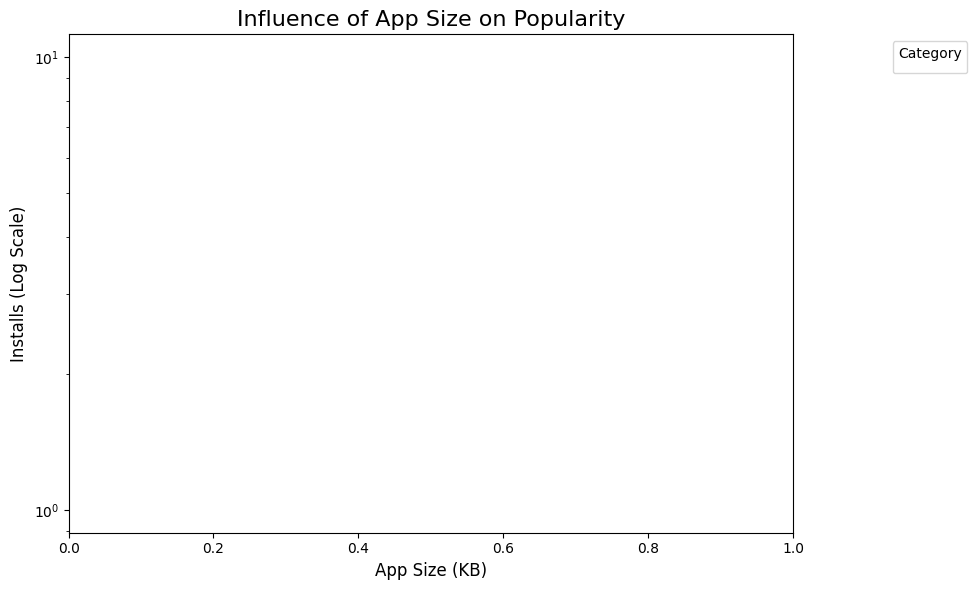

In [24]:
def analyze_size_vs_popularity(data):
    # Filter out apps with missing size or installs
    filtered_data = data.dropna(subset=['Size', 'Installs'])
    
    # Plot with a logarithmic scale for 'Installs'
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=filtered_data, x='Size', y='Installs', hue='Category', alpha=0.6)
    plt.yscale('log')  # Logarithmic scale for better visibility
    plt.title('Influence of App Size on Popularity', fontsize=16)
    plt.xlabel('App Size (KB)', fontsize=12)
    plt.ylabel('Installs (Log Scale)', fontsize=12)
    plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), title="Category")
    plt.tight_layout()
    plt.show()

analyze_size_vs_popularity(df)

In [18]:
# Save Processed Data
df.to_csv('processed_googleplaystore.csv', index=False)
print("Processed data saved as 'processed_googleplaystore.csv'.")


Processed data saved as 'processed_googleplaystore.csv'.
